# SUMMER ANALYTICS 2024



# Week-1 Assignment

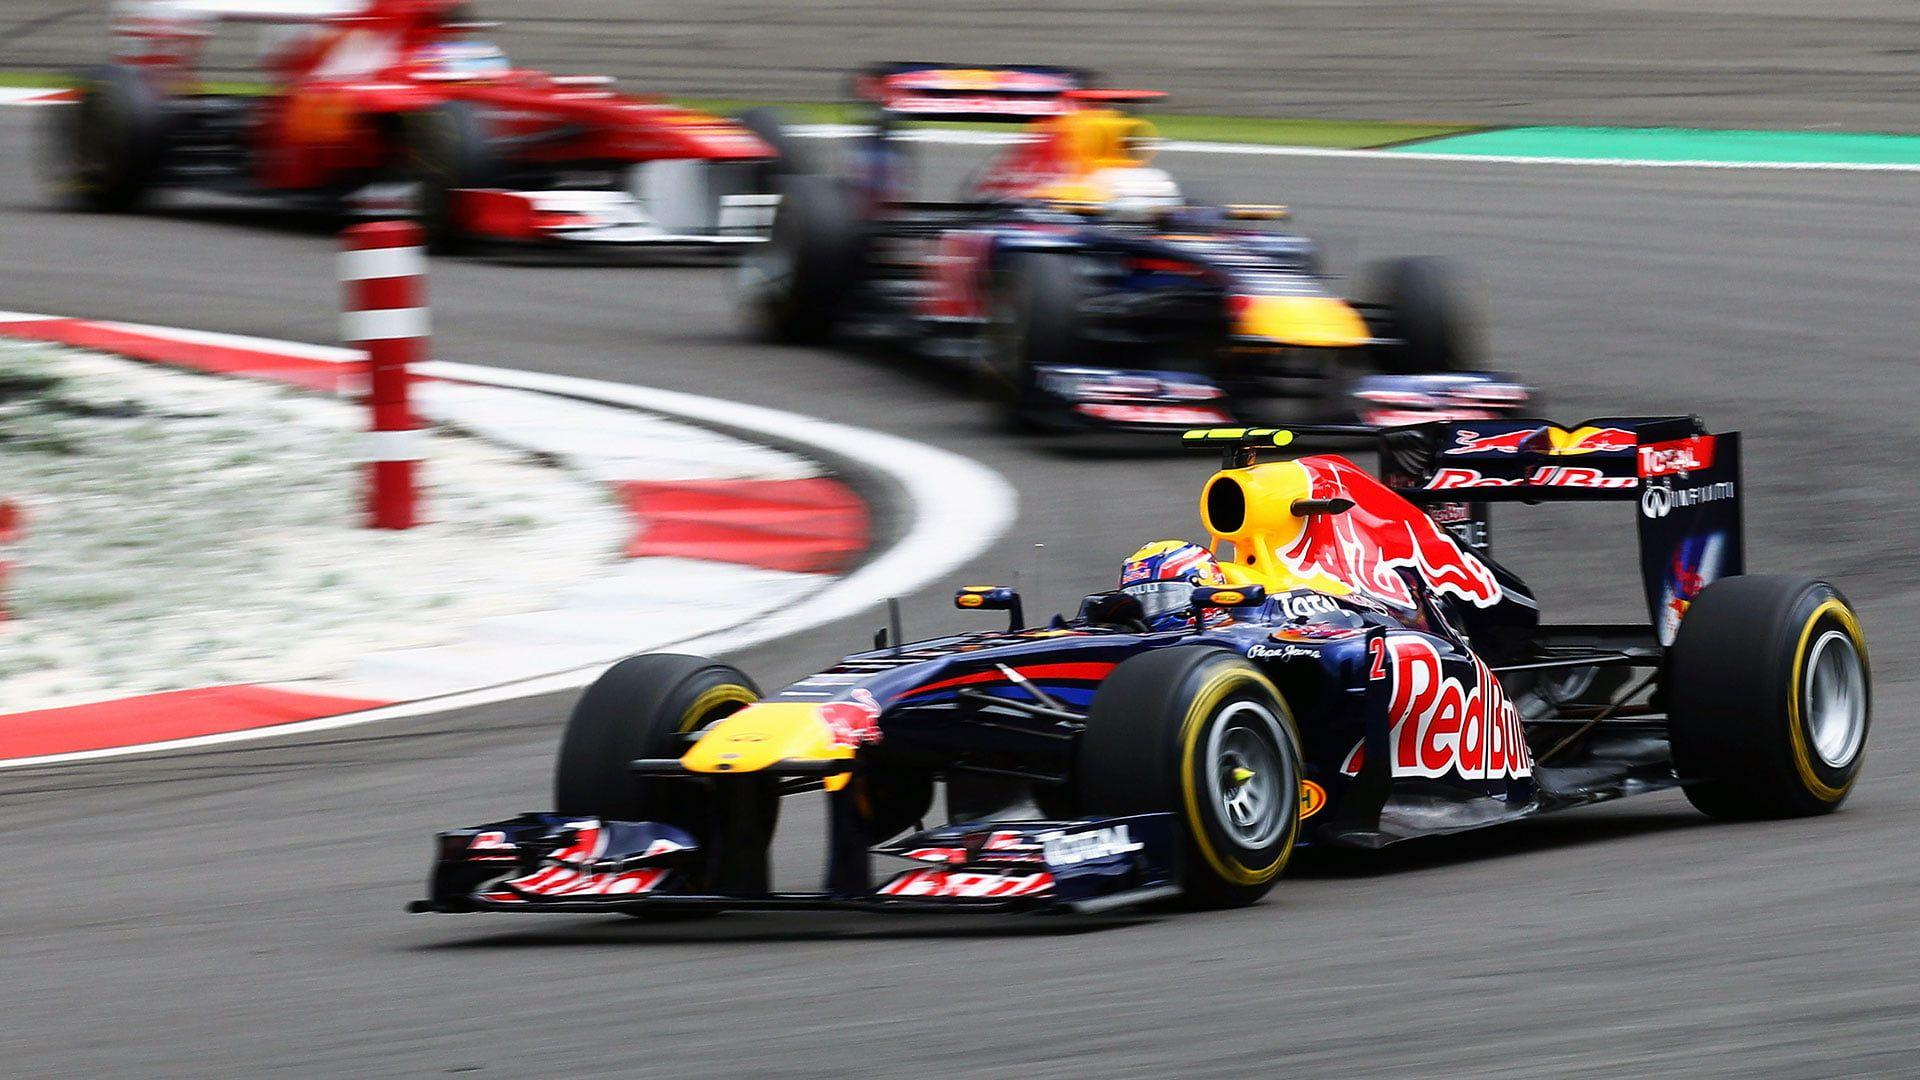

# **Data Grand Prix!**



**Welcome to your first assignment of Summer Analytics 2025! We hope you are excited to implement and test everything you have learnt up until now. The dataset which you'll use includes information about cars.**

**We've got an interesting set of questions for you to get a basic understanding of pandas and data visualization libraries. GOOD LUCK!**


***Let's get started with importing numpy, pandas, seaborn and matplotlib!***

Note - matplotlib should be imported with the command :

 `import matplotlib.pyplot as plt`

image.avif

**So lets get started!! Buckle up your belts for this exciting ride!!**

### 1) Start by importing all important libraries
For eg, "import numpy as np"

In [59]:
#your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2) Read the csv file and assign it to a variable .

In [60]:
df = pd.read_csv('Cars.csv')

### 3) Display shape of dataframe
Expected Output - (398, 9)

In [61]:
print(df.shape)

(398, 9)


### 4) Print all columns of dataframe
Return an array containing names of all the columns.

In [62]:
print(df.columns.values)

['mpg' 'cylinders' 'displacement' 'horsepower' 'weight' 'acceleration'
 'model_year' 'origin' 'name']


### 6) Set the 'name' column as the index of dataframe

In [63]:
df.set_index('name', inplace=True)

###  7) Print a list of all the unique mpg values





In [64]:
unique_mpg_values = df['mpg'].unique()
print(unique_mpg_values)

[18.  15.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.   9.
 28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5 15.5
 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5 21.5
 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1 17.7
 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6 18.2
 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8 41.5
 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9 40.8
 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5 39.1
 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2 22.4
 34.  38.  44. ]


### 8) Create a column which contains the horsepower divided by weightas its metric and make this new column the index.

In [65]:
df['hp_per_weight'] = df['horsepower'] / df['weight']
df.set_index('hp_per_weight', inplace=True)

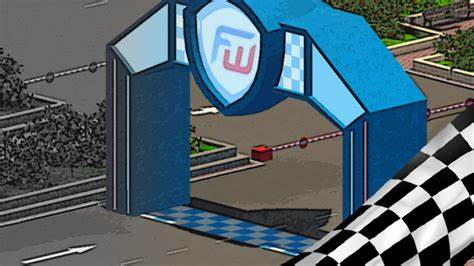

 **Checkpoint!!
Congratulations on making it this far. You are really keeping up in Data Grand Prix.
Now starts the real race i.e. graded questions of the quiz.**

## GRADED Questions (To be answered in the quiz)
### Try to retrieve some information from the data and answer the questions below . BEST OF LUCK !!

### 1. What is name of car that has the highest horsepower?  

In [66]:
max_hp_car = df.loc[df['horsepower'].idxmax(), :]
# print(max_hp_car)
print(df.loc[df['horsepower'].idxmax()].name)

0.053763440860215055


### 2. How many cars have mpg ≥ 35?

In [67]:
count_high_mpg = (df['mpg'] >= 35).sum()
print(count_high_mpg)

36


### 3. What is the most common origin for cars with horsepower > 100 and weight < 3000?

In [68]:
common_origin = df.loc[(df['horsepower'] > 100) & (df['weight'] < 3000), 'origin'].mode()[0]
print(common_origin)

usa


### 4. What is the mean acceleration of cars from Japan? (rounded to 2 decimals)

In [69]:
mean_accel_japan = round(df.loc[df['origin'] == 'japan', 'acceleration'].mean(), 2)
print(mean_accel_japan)

16.17


### 5. Which year had the highest average mpg?

In [70]:
highest_avg_mpg_year = df.groupby('model_year')['mpg'].mean().idxmax()
print(highest_avg_mpg_year)

80



## *Congratulations on coming this far! Since we were having so much fun playing with this dataset, let's move towards finish line by attempting some Ungraded questions!*

### **Note:** These questions are UNGRADED, and are given as an extra exercise.

### Find the car (or cars) with the best ratio of horsepower to weight among all cars that also have above-median mpg.

In [71]:
median_mpg = df['mpg'].median()

filtered_df = df[df['mpg'] > median_mpg]

filtered_df = filtered_df.reset_index()

best_hp_weight_car = filtered_df.loc[filtered_df['hp_per_weight'].idxmax()]
print(best_hp_weight_car)

hp_per_weight    0.050582
mpg                  26.0
cylinders               4
displacement        121.0
horsepower          113.0
weight               2234
acceleration         12.5
model_year             70
origin             europe
Name: 6, dtype: object


### Design a multi-line plot using Matplotlib or Seaborn that shows the evolution of average mpg over the years, separately for each origin

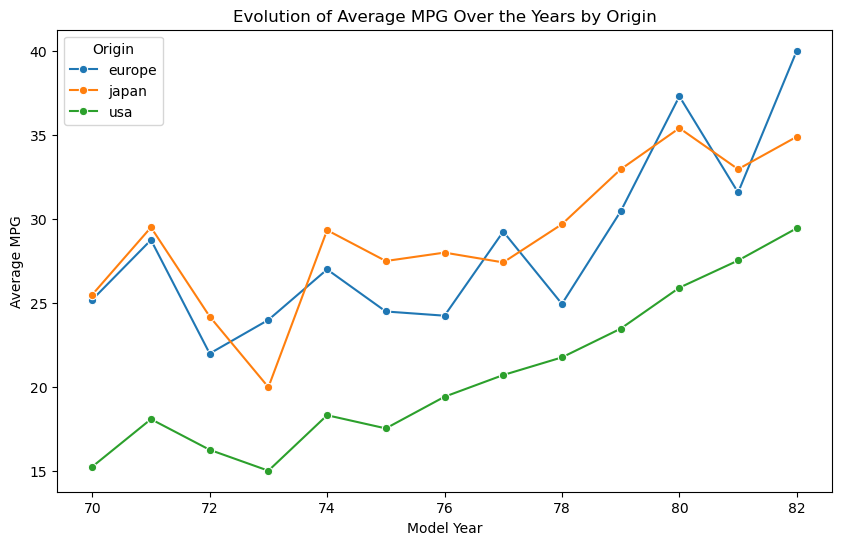

In [72]:
avg_mpg_by_year = df.groupby(['model_year', 'origin'])['mpg'].mean().reset_index()

# Create the multi-line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=avg_mpg_by_year, x='model_year', y='mpg', hue='origin', marker='o')

# Add labels and title
plt.xlabel('Model Year')
plt.ylabel('Average MPG')
plt.title('Evolution of Average MPG Over the Years by Origin')
plt.legend(title='Origin')

# Show the plot
plt.show()

### Create a Seaborn scatterplot (or PairGrid) where:

X = horsepower

Y = weight

Color by: origin

Size by: mpg

Hue order = ['japan', 'europe', 'usa']

Add meaningful plot titles and axis titles.

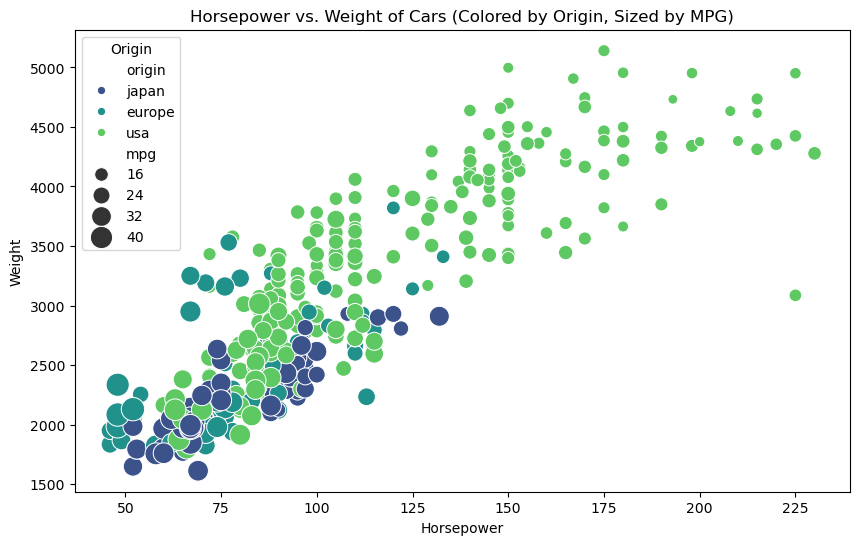

In [73]:
# Ensure there are no missing values in relevant columns
df_cleaned = df.dropna(subset=['horsepower', 'weight', 'origin', 'mpg'])

# Dynamically adjust hue_order in case some origins are missing
hue_order_list = [val for val in ['japan', 'europe', 'usa'] if val in df_cleaned['origin'].unique()]

# Set up the figure
plt.figure(figsize=(10, 6))

# Create the scatterplot
sns.scatterplot(
    data=df_cleaned, x='horsepower', y='weight', hue='origin', size='mpg',
    palette='viridis', hue_order=hue_order_list, sizes=(50, 300)
)

# Add titles and labels
plt.title('Horsepower vs. Weight of Cars (Colored by Origin, Sized by MPG)')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.legend(title='Origin')

# Show the plot
plt.show()

### We define a “consistent” car model as one that was produced over multiple years and had very low variation in mpg across those years (standard deviation < 1.0).

Tasks:

Identify car names that appear in more than one model_year.

For each such name, compute the standard deviation of mpg across years.

Return the car(s) with the lowest variation in mpg, among those with at least 2 appearances and std(mpg) < 1.0.

Report the model name(s), number of appearances, and the average mpg.

Bonus:
Sort the result by number of appearances (descending), then mpg (descending).

In [74]:
# Group by cylinders and model_year to find cars produced over multiple years
car_counts = df.groupby(['cylinders', 'displacement'])['model_year'].count()

# Filter cars appearing in multiple years
multi_year_cars = car_counts[car_counts > 1].index

# Compute standard deviation of mpg for these cars
mpg_std_dev = df[df.set_index(['cylinders', 'displacement']).index.isin(multi_year_cars)].groupby(['cylinders', 'displacement'])['mpg'].std()

# Filter cars with std(mpg) < 1.0
consistent_cars = mpg_std_dev[mpg_std_dev < 1.0].index

# Compute average mpg for these cars
avg_mpg = df[df.set_index(['cylinders', 'displacement']).index.isin(consistent_cars)].groupby(['cylinders', 'displacement'])['mpg'].mean()

# Compile results into a DataFrame
result_df = pd.DataFrame({
    'num_years': car_counts[consistent_cars],
    'std_mpg': mpg_std_dev[consistent_cars],
    'avg_mpg': avg_mpg
}).sort_values(by=['num_years', 'avg_mpg'], ascending=[False, False])

print(result_df)


                        num_years   std_mpg    avg_mpg
cylinders displacement                                
8         305.0                 4  0.962635  17.800000
4         113.0                 3  0.577350  24.333333
          71.0                  2  0.707107  31.500000
          141.0                 2  0.636396  27.650000
6         156.0                 2  0.707107  19.500000
          163.0                 2  0.565685  16.600000
8         440.0                 2  0.707107  13.500000


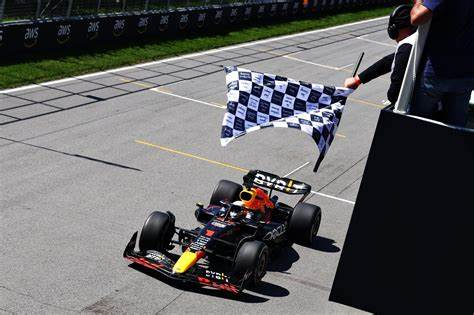

**Congratulations on completing the race. Kudos to you. Looking forward to meet you in next week.**